
# <font color=#770000>ICPE 639 Introduction to Machine Learning </font>

## ------ With Energy Applications

<p> &#169; 2021: Xiaoning Qian </p>

[Homepage](http://xqian37.github.io/)

**<font color=blue>[Note]</font>** This is currently a work in progress, will be updated as the material is tested in the class room.

All material open source under a Creative Commons license and free for use in non-commercial applications.

Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.


# State-Space Models

This section will cover the content listed below: 

- [1 State-Space Models](#1-State-Space-Models)
- [2 Hands-on Exercise](#2-Hands-on-Exercise)
- [Reference](#Reference) 

## 1 State-Space Models

### Model formulations

State-space models aim at modeling dynamic systems stemming from differential or difference equations depending on the continuous-time or discrete-time signal representations. Here we provide an introduction for simple **linear dynamic systems**: 
\begin{eqnarray*}
\mathbf{x}_t = A \mathbf{x}_{t-1} + \phi_t; \\
\mathbf{y}_t = M \mathbf{x}_t + \epsilon_t, 
\end{eqnarray*}
where $\mathbf{x}_t$ is the *state* vector for the dynamic signal (random process) of interest while $\mathbf{y}_t$ denotes the measurements that are observed; $A$ governs the state dynamics while $M$ characterizes the measurement process; $\phi_t$ and $\epsilon_t$ correspond to system and measurement noise respectively. Different model setups can be used depending on different state space and model assumptions. The argubaly most well-known model is with Gaussian assumptions to all the involved variables, leading to the well-known **Kalman filtering**. With discrete-time signal representations, this state-space model can give the traditional **Auto-Regressive (AR)** and **Moving Average (MA)**  or **ARIMA (AR integrated MA)** model setups if we do not consider "hidden states", for example, using the first equation only to model observed time series. 

**<font color=blue>[Note]</font>** The above noise terms can be made to incorporate potential external input by setting up the corresponding distribution models, which can be important for corresponding signal processing and control problems, as well as **reinforcement learning**, for example to incorporate potential baseline **level**, **trend**, **seasonality**, **periodicity**, etc. in time series analysis, including energy applications (e.g. assuming $\phi_t \sim \mathcal{N}(B\mathbf{u}_t, \Sigma_\phi)$). But here we introduce the math based on the above simple model setup. 

### Representive problem formulations

The following lists three most represetnative problems using state-space models: 

1. **Learning (Model parameter estimation/inference)**: Given observed data (complete or partial), how to estimate unknown model parameters? 
2. **Filtering**: Given observed measurements $Y_t = \{\mathbf{y}_0, \mathbf{y}_1, \ldots, \mathbf{y}_t\}$, how to infer the current state $\mathbf{x}_t$? 
3. **Smoothing**: Given observed measurements $Y_T = \{\mathbf{y}_0, \mathbf{y}_1, \ldots, \mathbf{y}_T\}$, how to infer a previous state $\mathbf{x}_t$ ($t<T$)?  
4. **Preciction (Forecasting)**: Given observed measurements $Y_t = \{\mathbf{y}_0, \mathbf{y}_1, \ldots, \mathbf{y}_t\}$, how to predict the state at the next time point $\mathbf{x}_{t+1}$? 

### Probabilistic graphical models (PGM)

Although we will not get deep into PGM in this course, we will introduce the basics in the context of state-space models here. In particular, we will focus on the linear state-space models with Gaussian random variables. We note that there are many reinvented wheels in different applications and therefore different names/terms referring to the same thing. For example, in linear dynamic systems (LDS), hidden Markov models (HMM), time series analysis, etc. We will introduce things based on traditional signal processing research, in particular related to **Kalman filtering**. 

To solve all the four problems mentioned earlier, the critical starting point is to understand the model and derive the corresponding **likelihood** function of the corresponding unknown(s) given the observed data. 

### Kalman filtering

Let's revisit the model with the Gaussian assumptions this time (*linear Gaussian state-space model*---**LG-SSM**): 
\begin{eqnarray*}
\mathbf{x}_t = A \mathbf{x}_{t-1} + \phi_t; \\
\mathbf{y}_t = M \mathbf{x}_t + \epsilon_t, 
\end{eqnarray*}
where $\phi_t \sim \mathcal{N}(0, \Sigma_\phi)$ and $\epsilon_t \sim \mathcal{N}(0, \Sigma_\epsilon)$. Note that we make the *stationarity* assumptions here as $A$, $M$, and the mean and covariance parameters do not change with time. As all the variables are Gaussian and the model is linear, with some basic algebraic manupilation, we can compute the corresponding probability functions and thereafter derive the corresponding **likelihood* function given the specific problem of interest, let it be learning, filtering, smoothing, or prediction. 

We focus on Kalman filtering in this course and more comprehensive introduction on other problems can be found in several machine learning books, including PML (https://probml.github.io/pml-book/) and BRML (http://web4.cs.ucl.ac.uk/staff/D.Barber/pmwiki/pmwiki.php?n=Brml.HomePage).

For **filtering**, we are interested in estimate the current state $\mathbf{x}_t$ given the observed measurements so far  $Y_t = \{\mathbf{y}_0, \mathbf{y}_1, \ldots, \mathbf{y}_t\}$. In probabilistic terms, we would like to derive: 
$$p(\mathbf{x}_t|Y_t).$$
We can see actually, this probability function can be considered as the likelihood of the current state $\mathbf{x}_t$ given the oberved data $Y_t$ and it is a fundamental identity in state-space models. For example, once you know $p(\mathbf{x}_t|Y_t)$, the **prediction** problem can be easily solved too: 
$$p(\mathbf{x}_{t+1}|Y_t) = \int_{\mathbf{x}_t}p(\mathbf{x}_{t+1}, \mathbf{x}_t|Y_t) d\mathbf{x}_t = \int_{\mathbf{x}_t}p(\mathbf{x}_{t+1} | \mathbf{x}_t) p(\mathbf{x}_t|Y_t)d\mathbf{x}_t $$
based on the state-space model setup with the corresponding (conditional) dependency structures. Note that 
$$p(\mathbf{x}_{t+1} | \mathbf{x}_t) \sim \mathcal{N}(A \mathbf{x}_{t}, \Sigma_\phi)$$
based on the model. 

In fact, in this LG-SSM, $p(\mathbf{x}_t|Y_t)$ is also Gaussian probability density function (PDF), we can write: 
$$p(\mathbf{x}_t|Y_t)\sim \mathcal{N}(\mu_t, \Sigma_t),$$
that can be characterized the mean $\mu_t$ and covariance $\Sigma_t$. The above is known as **moment representation**. 

**<font color=red>[Quiz/Homwork]</font>** Is $p(\mathbf{x}_{t+1}|Y_t)$ Gaussian? Can you derive $p(\mathbf{x}_{t+1}|Y_t)$ as a function of $\mu_t$, $\Sigma_t$, $A$, and $\Sigma_\phi$? (**Solution**: $A\mu_t$, $A\Sigma_t A^T + \Sigma_\phi$)




Now, we find out what should be $\mu_t$ and $\Sigma_t$ by deriving $p(\mathbf{x}_t|Y_t)$ by the Bayes rule: 
$$p(\mathbf{x}_t|Y_t) = \frac{ p(\mathbf{x}_t|Y_{t-1}))p(\mathbf{y}_t|\mathbf{x}_t) }{ p(\mathbf{y}_t|Y_{t-1})}$$
again using the dependency structure and Gaussianity in LG-SSM. 

Note now: 
$$p(\mathbf{y}_t|\mathbf{x}_t) \sim \mathcal{N}(M\mathbf{x}_t, \Sigma_\epsilon);$$
$$p(\mathbf{x}_t|Y_{t-1}) = \mathcal{N}(A\mu_{t-1}, A\Sigma_{t-1}A^T + \Sigma_\phi). $$

By completing the quadratic functional form in the exponent, we can get the following recursive updates: 
$$\mbox{Let}\quad P = A\Sigma_{t-1}A^T + \Sigma_\phi, \quad\mbox{then}$$
$$\mu_t = A\mu_{t-1} + PM^T(MPM^T + \Sigma_\epsilon)^{-1}(\mathbf{y}_t-MA\mu_{t-1})$$
$$\Sigma_t = P - PM^T(MPM^T + \Sigma_\epsilon)^{-1}MP. $$

Note that this essentially is the basic Kalman filtering implementation based on **forward algorithm**. The solution is indeed related to message passing or belief propagation algorithms in PGM. But in LG-SSM, we can see this iterative updating algorithm has closed-form updating solutions. For more general state-space models, more complicated solution algorithms have to be developed. 

Finally, for **smoothing**, we will need to essentially develop a **forward-backward algorithm** to compute the **moment representations* of the corresponding states. Again, the essense of the solution can be found in many reinvented wheels, for example *Viterbi algorithm* or many other dynamic programming solutions. 

**Learning** with only observed measurements $Y_T$ can be formulated and solved by **EM** algorithm, which again involves computing the corresponding likelihood of unknown model parameters given data. For the students who are interested in math derivation, the aforementioned two books can be good references. 



For more flexible state-space models, Extended or Unscented Kalman Filters (EKF, UKF) were developed with other more flexible distribution models (as in more general **particle filtering**). The difficulty is in model inference, which involves challenging Bayesian iverse problems. 

The other extreme direction is to completely data-driven to develop **recurrent neural networks (RNN)**, which can be found in another module.

## 2 Hands-on Exercise: Facebook Prophet

**Prophet** is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### Background

The Prophet forecasting model is based on the following formula
$$y(t) = g(t) + s(t) + h(t) + \epsilon_t,$$
where $y(t)$ are the observations at time $t, t=1,\dots, T$ (training data). $g(t)$, $s(t)$, $h(t)$ are the trend, seasonality, holiday components respectively.

The trends are modeled by a logistic (S-shape trend) function or a piecewise linear function. The seasonalities are modeled by the Fourier series. The holidays are modeled by the indicators. The illustration of the detailed model can be found in https://peerj.com/preprints/3190v2/

The forecasting procedure is: 

1. first obtain the estimation of these three components $\widehat{g}(t)$, $\widehat{s}(t)$, $\widehat{h}(t)$. 
2. At the new time point $T+1$, forecast the output value $\widehat{y}(T+1) = \widehat{g}(T+1) + \widehat{s}(T+1) + \widehat{h}(T+1)$.

**Pros of Prophet**: 

1. Flexibility: We can easily accommodate seasonality with multiple periods and let the analyst make different assumptions about trends.
2. Not neccessary time regularly spaced
3. Fast computation
4. Easily interpretable components

In [7]:
# install facebook prophet if it is not installed yet
!pip install prophet

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 178 kB 11.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640923 sha256=0a098c043db2c2b4cb88ce9f5dbb129b67a9100ac9b5fb7f286b321d99bd8728
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')

#### Read Data

To utilize Facebook Prophet forecasting model, the column names must be $ds$ (the data timestamps) and $y$ (the numeric values) respectively.

In [8]:
# Sample Energy consumption data of in UK.
# https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households
    
df1 = pd.read_csv('https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Energy.csv', parse_dates=["day"])

df1.columns = ["ds","y"]  # change the column names
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      673 non-null    datetime64[ns]
 1   y       673 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.6 KB



#### Forecasting

We then use the Prophet function to forecast the future values. To verify the forecasting model, we separate the electricity daily data into two parts. First part is the values from day 1 to day 650 as the training data, while the second part is the rest of days.

The arguments daily_seasonality, yearly_seasonality, and weekly_seasonality can be manually controlled based on training data. interval_width from 0 to 1 controls the size of forecasting confidence intervals. The higher interval_width is, the larger confidence interval is.

We also consider the holiday effects during forecasting, since the holidays do affect the electricity consumptions.

In [9]:
# import Prophet
from prophet import Prophet

# model fitting and forecasting
m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,interval_width=0.8)
m.add_country_holidays(country_name='US')
m.fit(df1[1:650])
future = m.make_future_dataframe(periods=31) # future 31 time points

forecast = m.predict(future) # forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds,yhat,yhat_lower,yhat_upper
675,2014-03-04,0.054980,0.041442,0.068889
676,2014-03-05,0.054993,0.040994,0.067549
677,2014-03-06,0.054564,0.040519,0.067725
678,2014-03-07,0.053380,0.039548,0.067004
679,2014-03-08,0.053655,0.041381,0.066698


In [10]:
m.train_holiday_names

0                 New Year's Day
1      New Year's Day (Observed)
2     Martin Luther King Jr. Day
3          Washington's Birthday
4                   Memorial Day
5               Independence Day
6                      Labor Day
7                   Columbus Day
8                   Veterans Day
9        Veterans Day (Observed)
10                  Thanksgiving
11                 Christmas Day
dtype: object

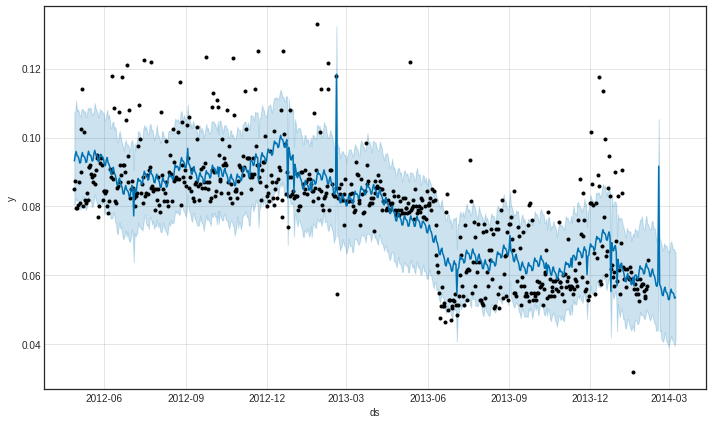

In [11]:
# plot the model fitting and forecasting with pointwise confidence intervals.
fig1 = m.plot(forecast)

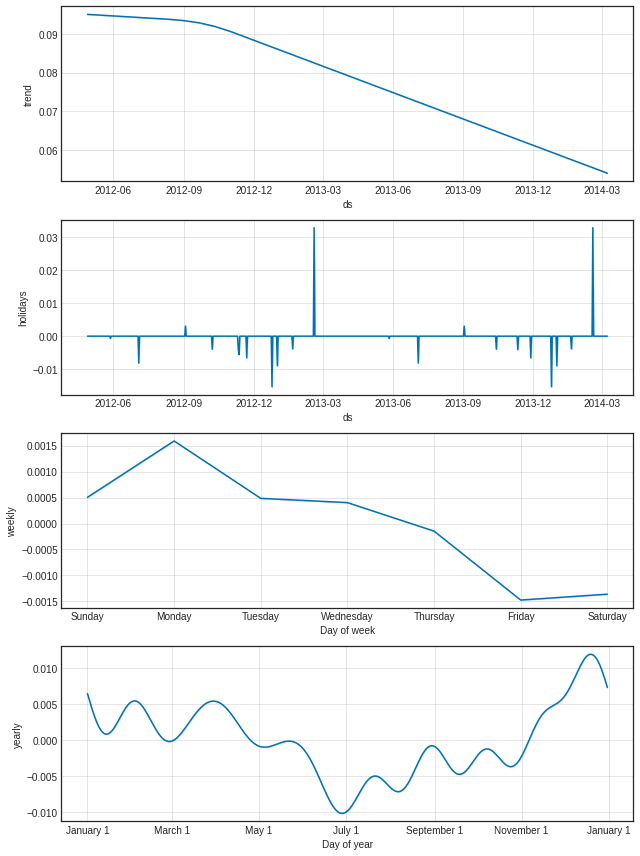

In [12]:
# different components 
fig2 = m.plot_components(forecast)

In [13]:
# interactive plots
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


#### Automatic anomaly detection
We develop the anomalydetection function to detect the anomalies via Facebook Prophet.

The inputs are data_train, data_test, and interval_width, while the outputs are the labels of normal data or anomalies.

Also, we can manually control the different seasonalities in the inner function.

In [14]:
# The automatic anomaly detection function
# inputs
# data_train: the training data consist two columns: first column 'ds' represents the timestamps; 
#               second column 'y' represents the numeric values.
# data_test: the testing data with two columns similar to data_train.
# interval_width: the width of prediction interval
# outputs
# labels: the labels indicating the testing data are anomalies or not.

def anomalydetection(data_train,data_test,interval_width):
    from prophet import Prophet
    m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,interval_width=interval_width)
    m.add_country_holidays(country_name='US')
    m.fit(data_train)
    future = m.make_future_dataframe(periods=data_test.shape[0])
    forecast = m.predict(future)

    intervals = forecast[(data_train.shape[0]):(data_train.shape[0]+data_test.shape[0])][['ds','yhat_lower','yhat_upper']]

    labels = []
    for i in range(data_test.shape[0]):
        if data_test.iloc[i-1].at['y'] > intervals.iloc[i-1].at['yhat_lower'] and data_test.iloc[i-1].at['y'] < intervals.iloc[i-1].at['yhat_upper']:
            labels.append('Normal')
        else:
            labels.append('Anomaly')
    return labels

In [15]:
anomalydetection(df1[0:650],df1[650:673],interval_width=0.95)

['Anomaly',
 'Normal',
 'Anomaly',
 'Normal',
 'Normal',
 'Normal',
 'Anomaly',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Anomaly',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal']

## Reference
*Some materials in this section are adapted from several resources listed below:* 

- https://towardsdatascience.com/
- [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)
- An Introduction to Statistical Learning : with Applications in R by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. New York: Springer, 2013.
- Open Machine Learning Course mlcourse.ai.

# Questions? 

In [ ]:
Image(url= "https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png", width=100)
